<a href="https://colab.research.google.com/github/jaosorioh/miniproyecto/blob/main/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 2. John Alexander Osorio Henao

### 1 - Gaussian model selection in the simplied Georgopoulos setting

In [ ]:
#Important libraries
import numpy as np
import matplotlib.pyplot as plt

#parameters for p, definition of u
p = 4
n = 2*p + 1
u = lambda i: 2*np.pi*i/n

### a)

For this exercise, we use the mod operator "\%" which gives the residual of a division. If the residual is 0, then we know that the index is even, otherwise it would be odd.

In [ ]:
#create empty matrix of size nxn
X = np.zeros((n, n))
#we loop over rows and columns
for i in range(n):
  for j in range(n):
    if j == 0: #indexing begins at 0
      X[i, j] = 1
    elif (j+1) % 2 == 0: #j = 2k (the +1 is because of different indexing)
      k = (j+1)//2 #floor operation
      X[i, j] = np.cos(k*u(i))
    else:
      k = (j)//2
      X[i, j] = np.sin(k*u(i))

### b)
For this exercise, we take the first $i = 0, ..., n - 1$ vectors and calculate the dot product with the $j = i, ..., n$, remaining vectors. We do it in this way to avoid repetiton.

In [ ]:
for i in range(0, n):
  for j in range(i, n):
    #dot is the function in python for the dot product
    print("<X_%d, X_%d> = %.2f "%(i, j, np.dot(X[:, i], X[:, j])))

<X_0, X_0> = 9.00 
<X_0, X_1> = -0.00 
<X_0, X_2> = 0.00 
<X_0, X_3> = -0.00 
<X_0, X_4> = 0.00 
<X_0, X_5> = 0.00 
<X_0, X_6> = 0.00 
<X_0, X_7> = -0.00 
<X_0, X_8> = 0.00 
<X_1, X_1> = 4.50 
<X_1, X_2> = 0.00 
<X_1, X_3> = -0.00 
<X_1, X_4> = -0.00 
<X_1, X_5> = -0.00 
<X_1, X_6> = 0.00 
<X_1, X_7> = 0.00 
<X_1, X_8> = 0.00 
<X_2, X_2> = 4.50 
<X_2, X_3> = -0.00 
<X_2, X_4> = -0.00 
<X_2, X_5> = 0.00 
<X_2, X_6> = -0.00 
<X_2, X_7> = 0.00 
<X_2, X_8> = -0.00 
<X_3, X_3> = 4.50 
<X_3, X_4> = 0.00 
<X_3, X_5> = 0.00 
<X_3, X_6> = 0.00 
<X_3, X_7> = -0.00 
<X_3, X_8> = 0.00 
<X_4, X_4> = 4.50 
<X_4, X_5> = 0.00 
<X_4, X_6> = -0.00 
<X_4, X_7> = -0.00 
<X_4, X_8> = -0.00 
<X_5, X_5> = 4.50 
<X_5, X_6> = 0.00 
<X_5, X_7> = 0.00 
<X_5, X_8> = 0.00 
<X_6, X_6> = 4.50 
<X_6, X_7> = 0.00 
<X_6, X_8> = -0.00 
<X_7, X_7> = 4.50 
<X_7, X_8> = 0.00 
<X_8, X_8> = 4.50 


It is clearly seen that when $i \neq j$, then the dot product is 0. Whereas for $i = j$, the vectors are not normalized. Let us normalize them by dividing each vector $X_i$ by its norm $||X_i||$.

In [ ]:
Xprime = np.zeros((n, n))
for i in range(0, n):
    #we extract the vector i
    Xi = X[:, i]
    #we divide by its norm
    Xprime[:, i] = Xi/np.sqrt(np.dot(Xi, Xi))
    print("||X_%d|| = %.2f "%(i, np.dot(Xprime[:, i], Xprime[:, i])))

||X_0|| = 1.00 
||X_1|| = 1.00 
||X_2|| = 1.00 
||X_3|| = 1.00 
||X_4|| = 1.00 
||X_5|| = 1.00 
||X_6|| = 1.00 
||X_7|| = 1.00 
||X_8|| = 1.00 


Now every vector has norm 1.

### c


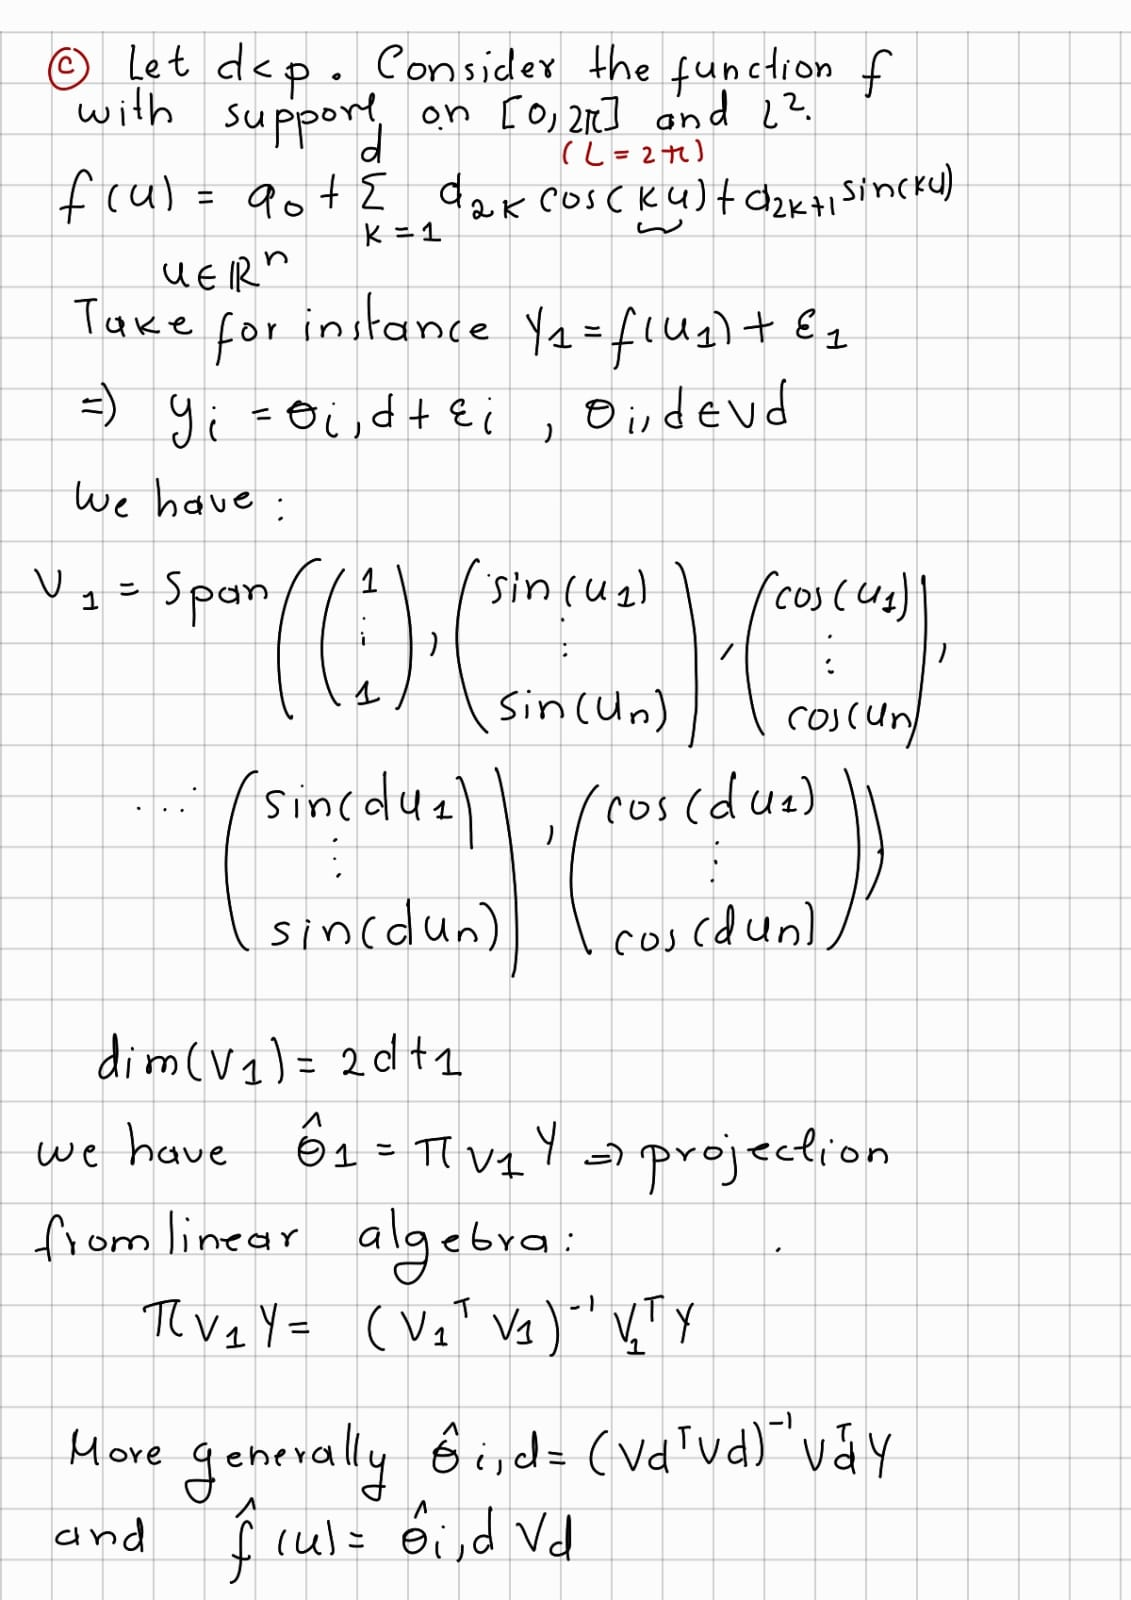

We will code the given function on Python where we will evaluate the coefficients and return the estimator $\hat{f}$

In [ ]:
def f_hat(d, Y):
  #if d is larger than p
  if(d > p):
    d = p
  n_d = 2*d + 1
  #we select only up to n_d values
  X_d = Xprime[:, 0:n_d]
  #we use the formula for the coefficients
  alpha_proj = np.linalg.inv(X_d.T @ X_d) @ X_d.T @ Y
  #we calculate the value of f_hat
  f_proj = X_d @ alpha_proj
  return f_proj

### d

  We have that $Y_{true} = 16 + 14 \cos(u_i)$ and $Z_{true} = 10 * exp(-((u_i - \pi)^2)/0.2)$

  Hence, $ Y_i = Y_{true} + \varepsilon_i$ and , $ Z_i = Z_{true} + \varepsilon_i$ with $ \varepsilon_i \sim N(0, 1) $. Let us determine this data:

In [ ]:
#We generate a vector with values u_i
i = np.arange(0, n)
u_i = u(i+1)

#we evalue u_i for Y true, and Z true
Yi_true = 16 + 14*np.cos(u_i)
Zi_true = 10*np.exp(-((u_i - np.pi)**2)/0.2)

#centered gaussian
eps_i = np.random.normal(loc=0,scale=1,size=n)
eps_i_2 = np.random.normal(loc=0,scale=1,size=n)

Yi = Yi_true + 5*eps_i
Zi = Zi_true + eps_i_2

Now, let us calculate in python the values of the projection estimators $\hat{Y_i}$ and $\hat{Z_i}$. We will use $d = 0, 1, 2, 3$

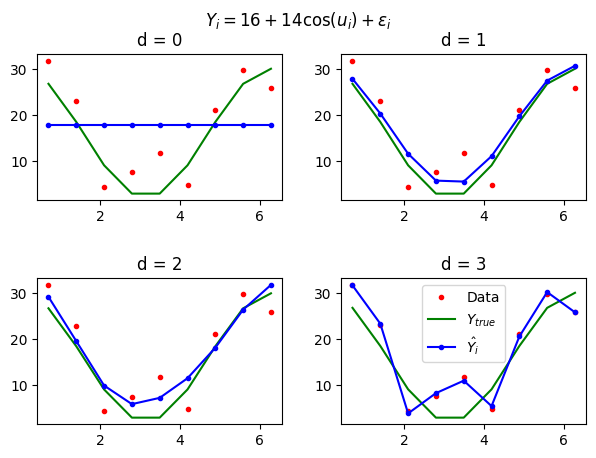

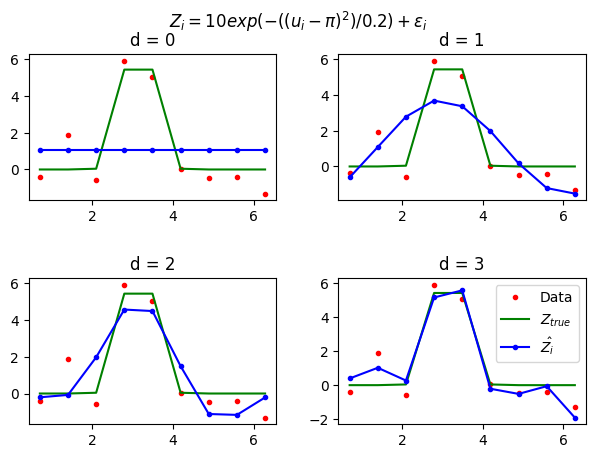

In [ ]:
fig = plt.figure()

#this is to produce a 2x2 plot
for d in range(0, p):
  plt.subplot(2, 2, d+1)
  Yi_hat = f_hat(d, Yi)
  plt.title('d = %d'%d)
  plt.plot(u_i, Yi, 'r.', label="Data")
  plt.plot(u_i, Yi_true, 'g', label=r"$Y_{true}$")
  plt.plot(u_i, Yi_hat, 'b.-', label=r'$\hat{Y_i}$')
fig.tight_layout(pad=2.3)
fig.suptitle(r"$Y_i = 16 + 14 \cos(u_i) + \varepsilon_i$")
plt.legend(loc=0)
plt.show()

fig = plt.figure()

for d in range(0, p):
  plt.subplot(2, 2, d+1)
  Zi_hat = f_hat(d, Zi)
  plt.title('d = %d'%d)
  plt.plot(u_i, Zi, 'r.', label="Data")
  plt.plot(u_i, Zi_true, 'g', label=r"$Z_{true}$")
  plt.plot(u_i, Zi_hat, 'b.-', label=r'$\hat{Z_i}$')
fig.tight_layout(pad=2.3)
fig.suptitle(r"$Z_i = 10 exp(-((u_i - \pi)^2)/0.2) + \varepsilon_i$")
plt.legend(loc=0)
plt.show()

We notice that in the case of $Y_i$,  $d = 1$ produces a good fit of the data. This is due to the fact $Y_{true}$ is already expanded in fourier series.

On the other hand, for larger d, we have that $\hat{Y_i}$ is fitted to all the points, but it differs from the shape of $Y_{true}$. It is clearly overfitted.

For $Z_i$, small d is not enough, a lot of points are missed in the fit. For $d = 3$, the fit is more similar to the shape of the true function.

### e)

The formula of the Mallow's criterion is given by:

$Cp = ||Y - \Pi_{V_d} Y||^2 + 2\sigma^2 dim(V_d)$

In the case of our problem, we can rewrite it as:

$Cp = ||Y_{true} - \hat{Y}||^2 + 2(2d + 1)$ since $\sigma^2 = 1$ for $\varepsilon_i$


In [ ]:
def mallows_criterion(Y, p, title):
  #let us calculate the values for each d
  Cp = np.array([])
  for d in range(0,p+1):
    #estimate the value at each point
    Y_hat = f_hat(d, Y)
    #calculating the Cp for the current d
    Cp = np.append(Cp, np.sum((Y-Y_hat)**2) + 2*(2*d + 1))
    print("d = %d, Cp = %0.2f"%(d, Cp[-1]))
  #index at which the value of Cp is min
  d_min = np.argmin(Cp)

  plt.plot(np.arange(0, p+1), Cp,'.-')
  plt.plot(d_min, np.min(Cp), 'o')
  plt.xlabel("d")
  plt.ylabel("Cp")
  plt.title("Mallow's criterion for " + title)
  plt.grid(True)
  plt.show()

  return d_min

Let us evaluate the criterion for the previous functions

d = 0, Cp = 884.00
d = 1, Cp = 6.00
d = 2, Cp = 10.00
d = 3, Cp = 14.00
d = 4, Cp = 18.00


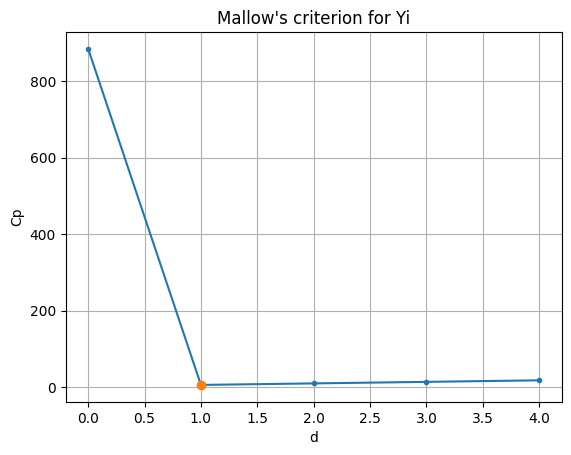

1

In [ ]:
#Applying the criterion to the first function
mallows_criterion(Yi_true, p, "Yi")

d = 0, Cp = 47.80
d = 1, Cp = 28.40
d = 2, Cp = 17.13
d = 3, Cp = 14.76
d = 4, Cp = 18.00


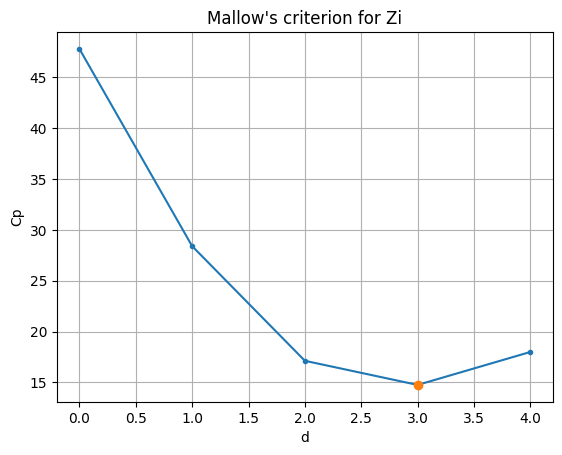

3

In [ ]:
mallows_criterion(Zi_true, p, "Zi")

By checking the results of the Mallows Criterion, we notice that they are in agreement with what is observed in the plots of 2d. For $Y_i$, the best fit is at $d = 1$, and for $Z_i$ is at $d = 3$.

### 2. Cross-validation for kernel estimators

### a.

For this exercise, we will use a fixed vector u whose elements are in the range [-6, 6]

In [ ]:
#kernel
K_x = lambda x: np.exp(-0.5*x**2)/np.sqrt(2*np.pi)
#let's calculate n ISI variables
n = 100
X = np.random.standard_exponential(n)
#fixed vector
u = np.linspace(-6, 6, 200)

Let us write the function as given in the exercise, and let us consider four different values for the bandwidth h = 0.5, 1, 2, 4.

In [ ]:
#with this function, we evaluate the kernel estimator
def kernel_estimator(K, h, X, u):
  n_ = len(X)
  #we evaluate for each element of u
  f_h_u = np.array([np.sum(K_x((u_i-X)/h))/(n_*h) for u_i in u])
  return f_h_u

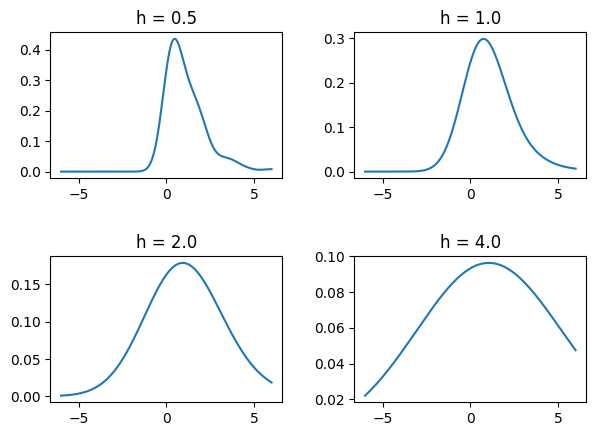

In [ ]:
#different values for the bandwidth
h = [0.5, 1, 2, 4]

fig = plt.figure()

#this is to produce a 2x2 plot
for i in range(0, len(h)):
  plt.subplot(2, 2, i+1)
  f_hat_h = kernel_estimator(K_x, h[i], X, u)
  plt.plot(u, f_hat_h)
  plt.title('h = %.1f'%h[i])
fig.tight_layout(pad=2.3)
plt.show()


### b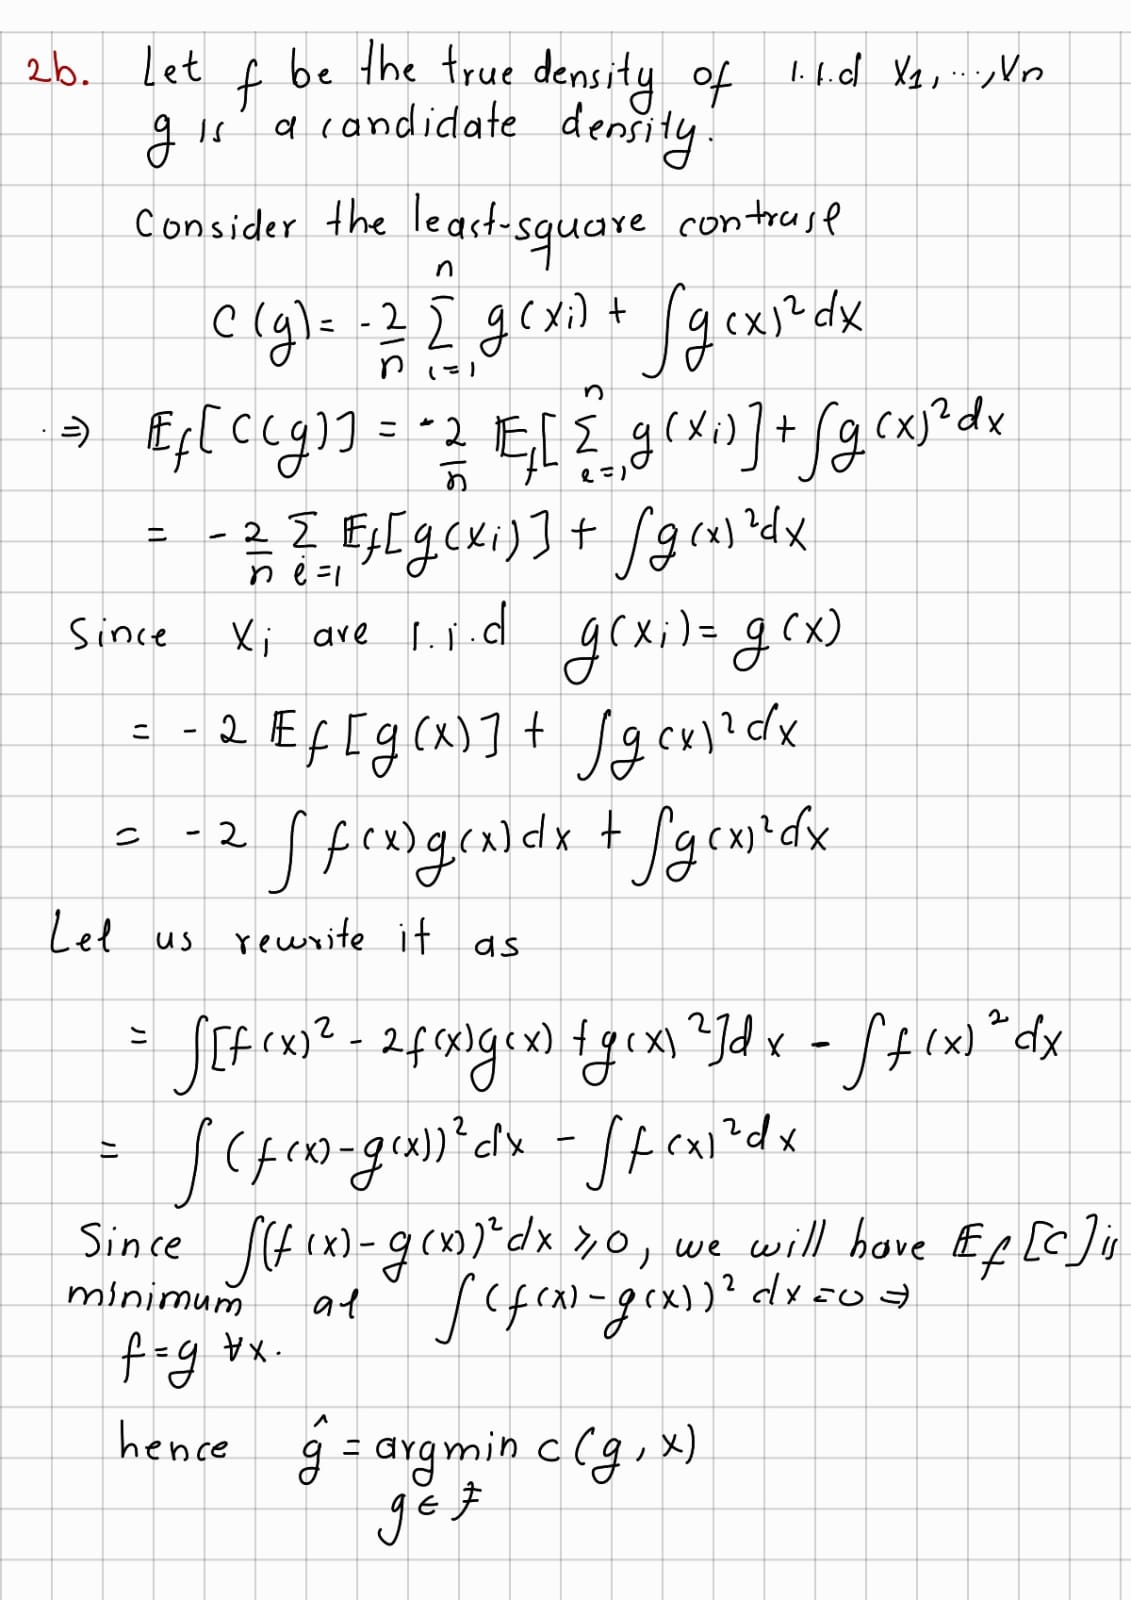

### c

Let us now use the formula of the least square contrast, where we will mantain the same values for u but use a different sample for the i.i.d. ISI's $X_i$. To integrate in python, we will use quad, which evaluates an integral numerically.

In [ ]:
from scipy.integrate import quad

In [ ]:
#modified kernel estimator for a variable instead of a vector
def f_S_L(h, X_L, x):
  return np.sum(K_x((x-X_L))/h)/(len(X_L)*h)

#evaluation of the least square contrast when we have two different samples
def least_square_contrast(h, X_L, X_T, x):
  #we split the contrast into the sum term, which is the average of the kernel estimator
  sum_term = -2*np.sum([f_S_L(h, X_L, X_T_) for X_T_ in X_T])/len(X_T)
  #here we are evaluating the square of the estimator
  f_S_L_2 = lambda x: f_S_L(h, X_L, x)**2
  #integration of the kernel estimator to the square
  int_term = quad(f_S_L_2, x.min(), x.max())[0]
  return sum_term + int_term



### d
To evalulate the hold out estimator, we will order the values of $X_1,...,X_n$ randomly and then split them in half in the learning set $X_L$ and test set $X_T$. We will try with the h values from a) and evaluate where the least-square contrast has a minimum.

min C(g) = -0.30 at h = 1


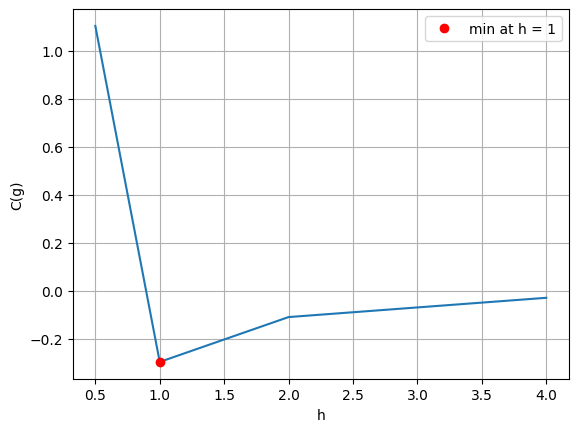

In [ ]:
Y = X
#function to order the values randomly
np.random.shuffle(Y)
X_L = Y[:n//2]#split in two
X_T = Y[n//2:]
h = [0.5, 1, 2, 4]

C_h = np.array([least_square_contrast(h_, X_L, X_T, u) for h_ in h])
#index where the value is minium
h_hat = h[np.argmin(C_h)]
C_min = C_h.min()

plt.plot(h, C_h)
plt.xlabel("h")
plt.ylabel("C(g)")
plt.grid(True)
plt.plot(h_hat, C_min, 'ro', label="min at h = %d"%h_hat)
plt.legend(loc=0)

#print("min C(g) = %0.2f at h = %d"%(C_min, h_hat))

We conclude that h = 1 is the best choice for the parameter as it minimizes the least-square contrast.

### e

We will implement the V-fold cross validation with V = 10. Here we split the indexed data for each $k = 1,..., V$, where $X_i$ with $i = 1,..,k$ will be used for learning set and with $i = k+1, ..., n$ for the test set. Then we will calculate the v-fold cv for each k and take the average. We will use the same values for h as before.

min V-fold = -0.25 at h = 1


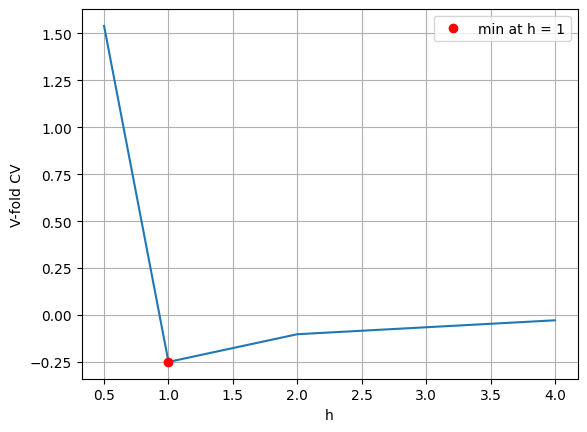

In [ ]:
Y = X
#function to order the values randomly
np.random.shuffle(Y)
V = 10

def v_fold(V, h, X, u):
  sum_C = 0
  for k in range(1, V):
    X_L = X[:k]#split in two
    X_T = X[k+1:]
    sum_C+=least_square_contrast(h, X_L, X_T, u)
  return sum_C/V

C_V_fold = np.array([v_fold(V, h_, X, u) for h_ in h])
#index where the value is minium
h_hat = h[np.argmin(C_V_fold)]
C_min = C_V_fold.min()

plt.plot(h, C_V_fold)
plt.xlabel("h")
plt.ylabel("V-fold CV")
plt.grid(True)
plt.plot(h_hat, C_min, 'ro', label="min at h = %d"%h_hat)
plt.legend(loc=0)

#print("min V-fold = %0.2f at h = %d"%(C_min, h_hat))

The results are in agreement with f) where we found the best parameter to be at h = 1.